Sample usage for generating Quantile Forecasts in DAM and BM.

DAM Models First, BM Second.

Models ordered as follows:


Machine Learning Models-

1.) KNN 

2.) LGBM 

3.) RF


Statistical Models-

4.) LEAR 


In [1]:
# Importing necessary libraries and modules
from EnbPI_SPCI_DAM import plot_quantile_pairs_DAM, LEAR_alpha, fit_multitarget_model_SPCI_DAM, rolling_walk_forward_validation_SPCI_DAM, load_data_DAM, load_data_BM, generate_train_and_test_dataframes_DAM, fit_multitarget_model_EnbPI_DAM, rolling_walk_forward_validation_EnbPI_DAM 
from sklearn_quantile import RandomForestQuantileRegressor, KNeighborsQuantileRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLarsIC, Lasso

# File path to the data
file_path = "DAM_Data.csv"

# Loading data from DAM CSV file
# dat: DataFrame containing features
# Y: DataFrame containing target variable
# Y1: DataFrame containing a subset of target variable
dat, Y, Y1 = load_data_DAM(file_path)


KNN EnbPI Forecast DAM

train_start_time: 2021-03-03 00:00:00, train_end_time: 2021-06-01 00:00:00, test_start_time: 2021-06-01 00:00:00, test_end_time: 2021-06-02 00:00:00
1/24 multi-step: finish Fitting 20 Bootstrap models, took 0.5137872695922852 secs.
2/24 multi-step: finish Fitting 20 Bootstrap models, took 0.41040635108947754 secs.
3/24 multi-step: finish Fitting 20 Bootstrap models, took 0.4261491298675537 secs.
4/24 multi-step: finish Fitting 20 Bootstrap models, took 0.46109533309936523 secs.
5/24 multi-step: finish Fitting 20 Bootstrap models, took 0.3822474479675293 secs.
6/24 multi-step: finish Fitting 20 Bootstrap models, took 0.43309950828552246 secs.
7/24 multi-step: finish Fitting 20 Bootstrap models, took 0.37702274322509766 secs.
8/24 multi-step: finish Fitting 20 Bootstrap models, took 0.3569023609161377 secs.
9/24 multi-step: finish Fitting 20 Bootstrap models, took 0.43448495864868164 secs.
10/24 multi-step: finish Fitting 20 Bootstrap models, took 0.3643679618835449 secs.
11/24 multi-ste

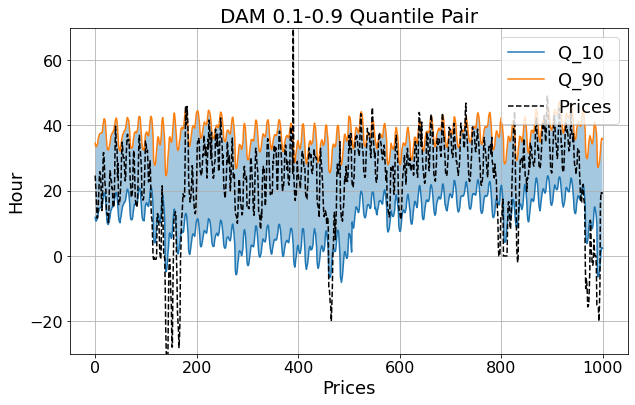

In [2]:
# Rolling walk-forward validation using EnbPI method on DAM data
# Parameters:
#   - model: KNeighborsQuantileRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results

rolling_walk_forward_validation_EnbPI_DAM(model=KNeighborsQuantileRegressor(q=[0.50], n_neighbors=290, p=1, leaf_size=1),
                                           data=dat,
                                           start_time='1/6/2021 00:00',
                                           end_time='2/6/2021  00:00',
                                           targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                           training_days=-365,
                                           path="knn_EnbPI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/knn_EnbPI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

KNN SPCI Forecast DAM

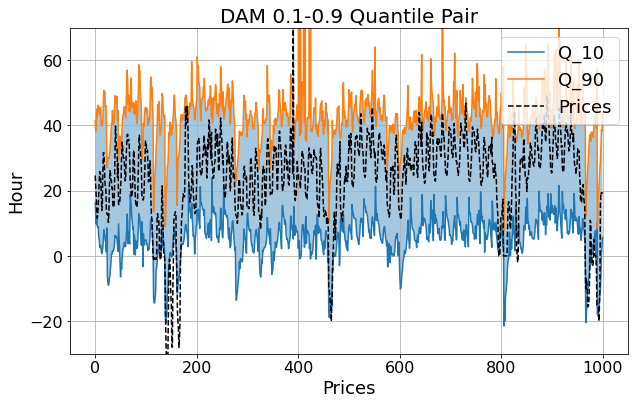

In [3]:
# Rolling walk-forward validation using SPCI method on DAM data
# Parameters:
#   - model: KNeighborsQuantileRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_DAM(model=KNeighborsQuantileRegressor(q=[0.50], n_neighbors=290, p=1, leaf_size=1),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                         path="knn_SPCI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/knn_SPCI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

LGBM SPCI Forecast DAM

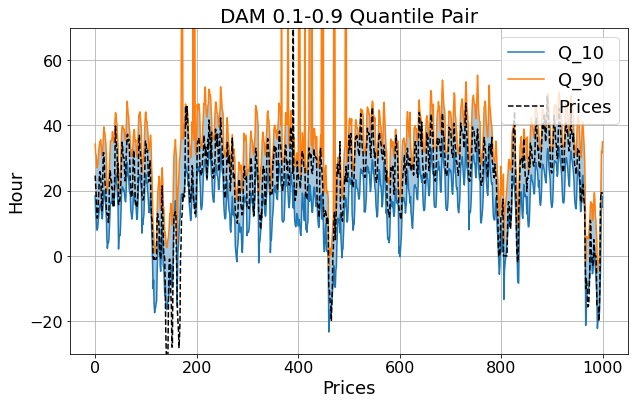

In [4]:
# Rolling walk-forward validation using SPCI method on DAM data with LightGBM quantile regression
# Parameters:
#   - model: LGBMRegressor model with quantile regression objective and specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_DAM(model=lgb.LGBMRegressor(objective='quantile', alpha=0.5, learning_rate=0.05, num_leaves=20, max_depth=10, n_estimators=300, verbose=-1),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                         path="lgbm_SPCI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/lgbm_SPCI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

LGBM EnbPI Forecast DAM

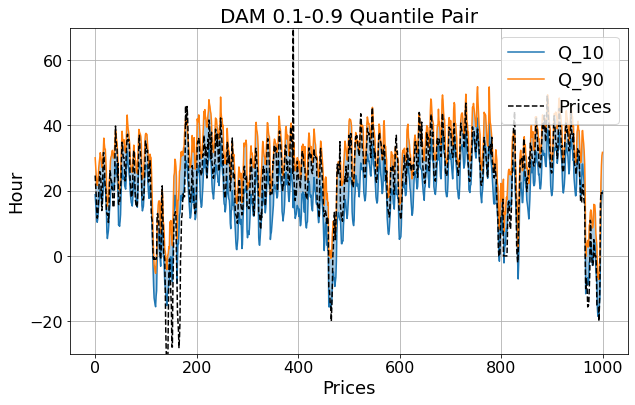

In [5]:
# Rolling walk-forward validation using EnbPI method on DAM data with LightGBM quantile regression
# Parameters:
#   - model: LGBMRegressor model with quantile regression objective and specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_DAM(model=lgb.LGBMRegressor(objective='quantile', alpha=0.5, learning_rate=0.05, num_leaves=20, max_depth=10, n_estimators=300, verbose=-1),
                                          data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                          path="lgbm_EnbPI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/lgbm_EnbPI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

RF EnbPI Forecast DAM

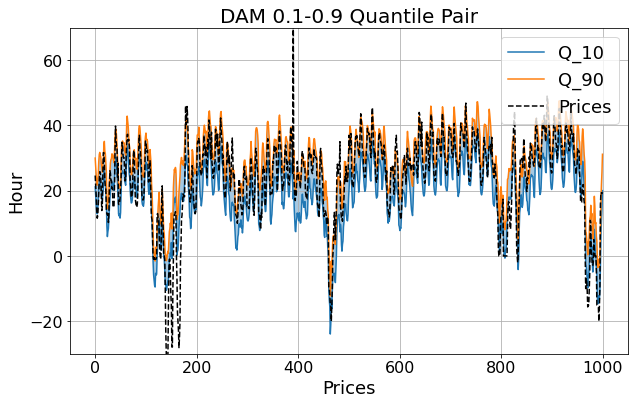

In [6]:
# Rolling walk-forward validation using EnbPI method on DAM data with RandomForestRegressor
# Parameters:
#   - model: RandomForestRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_DAM(model=RandomForestRegressor(max_depth=70, max_features=150, n_estimators=300),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                         path="RF_EnbPI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/rf_EnbPI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

RF SPCI Forecast DAM

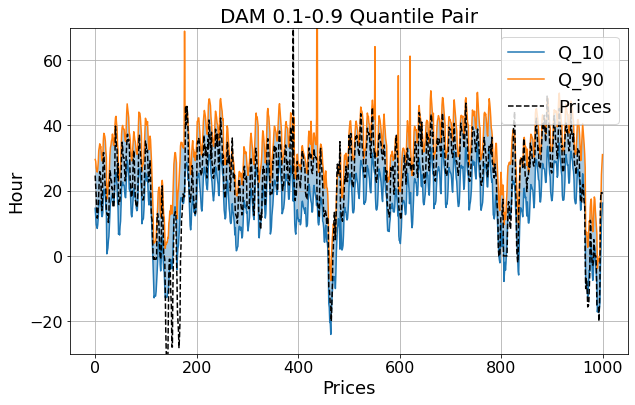

In [7]:
# Rolling walk-forward validation using SPCI method on DAM data with RandomForestRegressor
# Parameters:
#   - model: RandomForestRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_DAM(model=RandomForestRegressor(max_depth=70, max_features=150, n_estimators=300),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                         path="RF_SPCI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/rf_SPCI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

LEAR EnbPI Forecast DAM

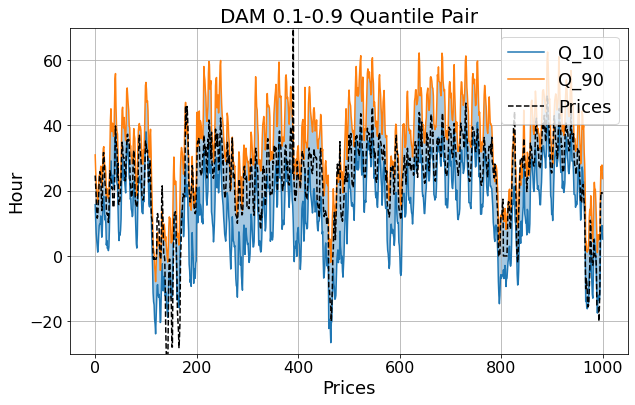

In [8]:
# Calculate alpha using LEAR method
alpha = LEAR_alpha(dat)

# Rolling walk-forward validation using EnbPI method on DAM data with Lasso regression
# Parameters:
#   - model: Lasso regression model with specified parameters including alpha calculated from LEAR method
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_DAM(model=Lasso(max_iter=2500, alpha=alpha),
                                          data=dat,
                                          start_time='1/6/2021 00:00',
                                          end_time='2/6/2021  00:00',
                                          targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                          training_days=-365,
                                          path="LEAR_EnbPI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/LEAR_EnbPI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

LEAR SPCI Forecast DAM

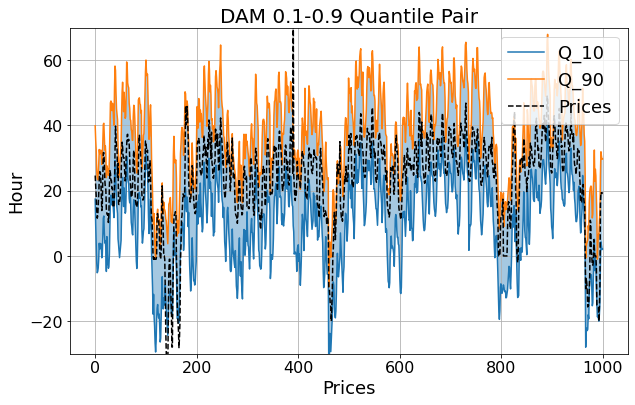

In [10]:
# Rolling walk-forward validation using SPCI method on DAM data with Lasso regression
# Parameters:
#   - model: Lasso regression model with specified parameters including alpha calculated from LEAR method
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_DAM(model=Lasso(max_iter=2500, alpha=alpha),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='2/6/2021  00:00',
                                         targets=dat.iloc[:, 0:24].columns.values.tolist(),
                                         training_days=-365,
                                         path="LEAR_SPCI_DAM_test")

# Plot Forecasts 0.1-0.9 Quantile Pair
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/DAM/LEAR_SPCI_DAM_1-12.csv")
plot_quantile_pairs_DAM(Quantile_Forecasts)

In [12]:
# Import necessary functions from EnbPI_SPCI_BM module
from EnbPI_SPCI_BM import load_data_BM, generate_train_and_test_dataframes_BM,plot_quantile_pairs_BM, LEAR_alpha_BM, fit_multitarget_model_EnbPI_BM, rolling_walk_forward_validation_EnbPI_BM, fit_multitarget_model_SPCI_BM, rolling_walk_forward_validation_SPCI_BM

# Example usage:
# Load data from the specified file path
file_path = "BM_data.csv"
dat, Y, Y1 = load_data_BM(file_path)

KNN EnbPI Forecast BM

train_start_time: 2020-12-07 00:00:00, train_end_time: 2021-01-06 00:00:00, test_start_time: 2021-01-06 00:00:00, test_end_time: 2021-01-06 08:00:00
1/16 multi-step: finish Fitting 20 Bootstrap models, took 0.5929100513458252 secs.
2/16 multi-step: finish Fitting 20 Bootstrap models, took 0.5437784194946289 secs.
3/16 multi-step: finish Fitting 20 Bootstrap models, took 0.4304344654083252 secs.
4/16 multi-step: finish Fitting 20 Bootstrap models, took 0.6197123527526855 secs.
5/16 multi-step: finish Fitting 20 Bootstrap models, took 0.5509209632873535 secs.
6/16 multi-step: finish Fitting 20 Bootstrap models, took 0.6021783351898193 secs.
7/16 multi-step: finish Fitting 20 Bootstrap models, took 0.392719030380249 secs.
8/16 multi-step: finish Fitting 20 Bootstrap models, took 0.559149980545044 secs.
9/16 multi-step: finish Fitting 20 Bootstrap models, took 0.5334250926971436 secs.
10/16 multi-step: finish Fitting 20 Bootstrap models, took 0.444033145904541 secs.
11/16 multi-step: finis

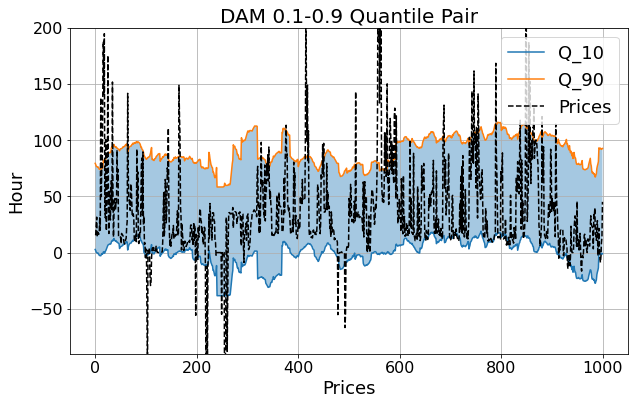

In [16]:
# Rolling walk-forward validation using EnbPI method on BM data with KNeighborsQuantileRegressor
# Parameters:
#   - model: KNeighborsQuantileRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_BM(model=KNeighborsQuantileRegressor(q=[0.50], n_neighbors=290, p=1, leaf_size=1),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='1/6/2021  08:00',
                                         targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                         training_days=-365,
                                         path="knn_EnbPI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/knn_EnbPI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

KNN SPCI Forecast BM

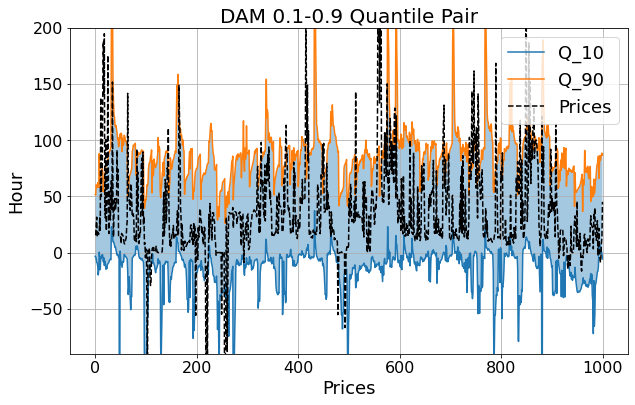

In [17]:
# Rolling walk-forward validation using SPCI method on BM data with KNeighborsQuantileRegressor
# Parameters:
#   - model: KNeighborsQuantileRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_BM(model=KNeighborsQuantileRegressor(q=[0.50], n_neighbors=290, p=1, leaf_size=1),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='1/6/2021  08:00',
                                         targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                         training_days=-365,
                                         path="knn_SPCI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/knn_SPCI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

RF EnbPI Forecast BM

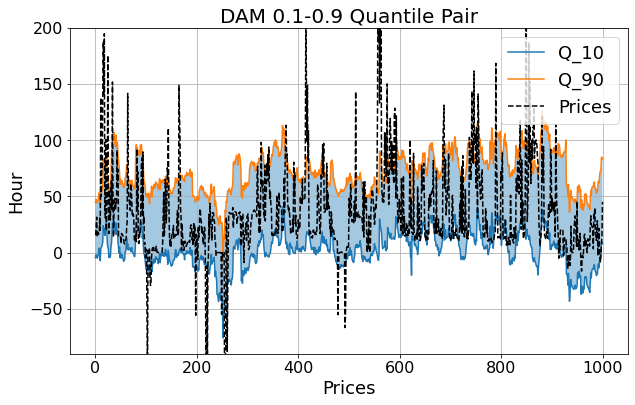

In [18]:
# Rolling walk-forward validation using EnbPI method on BM data with RandomForestRegressor
# Parameters:
#   - model: RandomForestRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_BM(model=RandomForestRegressor(max_depth=80, max_features=400, n_estimators=300),
                                          data=dat,
                                          start_time='1/6/2021 00:00',
                                          end_time='1/6/2021  08:00',
                                          targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                          training_days=-365,
                                          path="knn_EnbPI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/rf_EnbPI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

RF SPCI Forecast BM

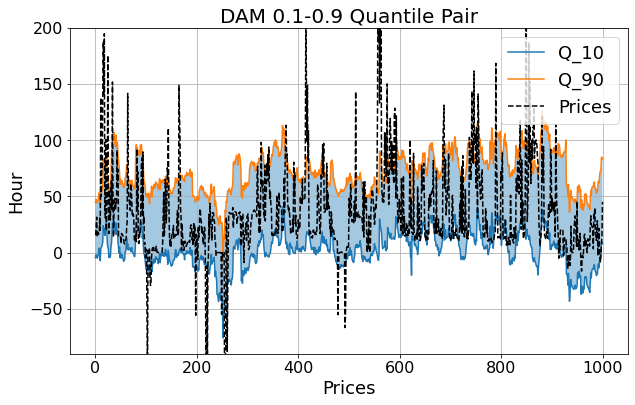

In [20]:
# Rolling walk-forward validation using SPCI method on BM data with RandomForestRegressor
# Parameters:
#   - model: RandomForestRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_BM(model=RandomForestRegressor(max_depth=80, max_features=400, n_estimators=300),
                                        data=dat,
                                        start_time='1/6/2021 00:00',
                                        end_time='1/6/2021  08:00',
                                        targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                        training_days=-365,
                                        path="knn_SPCI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/rf_SPCI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

LGBM EnbPI Forecast BM

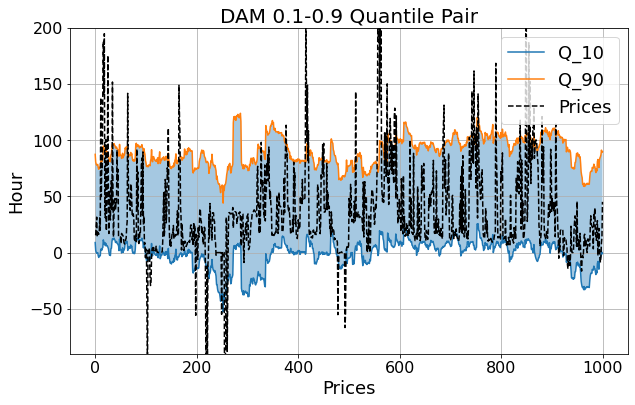

In [21]:
# Rolling walk-forward validation using EnbPI method on BM data with LGBMRegressor
# Parameters:
#   - model: LGBMRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_BM(model=lgb.LGBMRegressor(objective='quantile', alpha=0.5, learning_rate=0.05, num_leaves=40, max_depth=10, n_estimators=1000, verbose=-1),
                                          data=dat,
                                          start_time='1/6/2021 00:00',
                                          end_time='1/6/2021  08:00',
                                          targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                          training_days=-365,
                                          path="knn_EnbPI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/lgbm_EnbPI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

LGBM SPCI Forecast BM

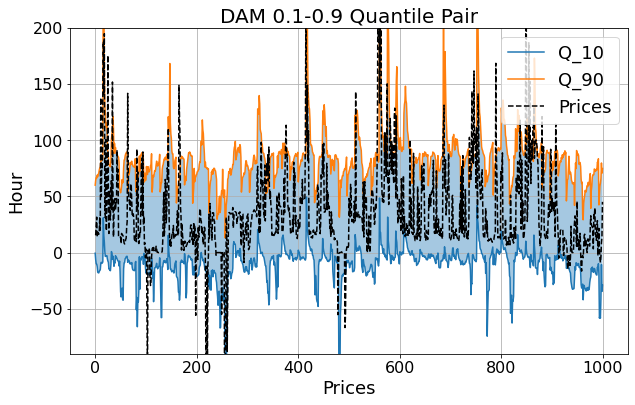

In [22]:
# Rolling walk-forward validation using SPCI method on BM data with LGBMRegressor
# Parameters:
#   - model: LGBMRegressor model with specified parameters
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_BM(model=lgb.LGBMRegressor(objective='quantile', alpha=0.5, learning_rate=0.05, num_leaves=40, max_depth=10, n_estimators=1000, verbose=-1),
                                        data=dat,
                                        start_time='1/6/2021 00:00',
                                        end_time='1/6/2021  08:00',
                                        targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                        training_days=-365,
                                        path="knn_SPCI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/lgbm_SPCI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

LEAR EnbPI Forecast BM

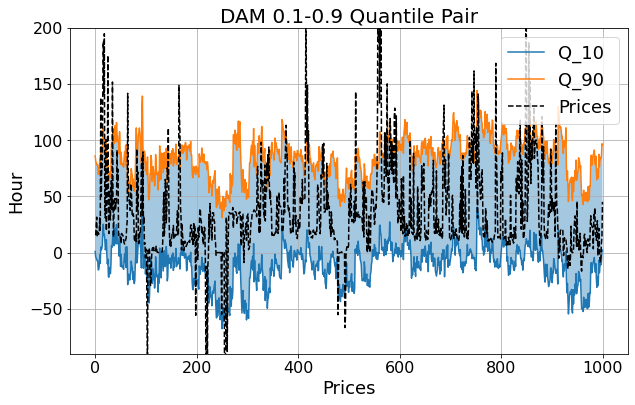

In [23]:
# Calculate alpha using LEAR_alpha_BM function
alpha = LEAR_alpha_BM("BM_data.csv")

# Rolling walk-forward validation using EnbPI method on BM data with Lasso regression
# Parameters:
#   - model: Lasso regression model with specified alpha
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_EnbPI_BM(model=Lasso(max_iter=2500, alpha=alpha),
                                         data=dat,
                                         start_time='1/6/2021 00:00',
                                         end_time='1/6/2021  08:00',
                                         targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                         training_days=-365,
                                         path="knn_EnbPI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/LEAR_EnbPI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)

LEAR SPCI Forecast BM

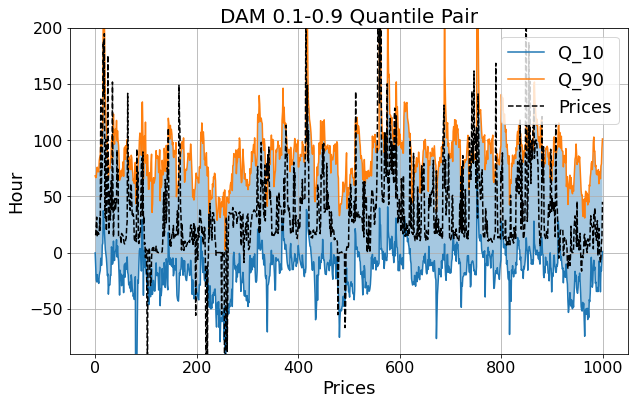

In [24]:
# Rolling walk-forward validation using SPCI method on BM data with Lasso regression
# Parameters:
#   - model: Lasso regression model with specified alpha
#   - data: DataFrame containing the features
#   - start_time: Start time for the validation period
#   - end_time: End time for the validation period
#   - targets: List of column names representing the target variables
#   - training_days: Number of days for training data
#   - path: Path to save the test results
rolling_walk_forward_validation_SPCI_BM(model=Lasso(max_iter=2500, alpha=alpha),
                                        data=dat,
                                        start_time='1/6/2021 00:00',
                                        end_time='1/6/2021  08:00',
                                        targets=dat.iloc[:, 0:16].columns.values.tolist(),
                                        training_days=-365,
                                        path="knn_SPCI_BM_test")

# Plot of Results
Quantile_Forecasts = pd.read_csv("Conformal_Prediction/BM/LEAR_SPCI_BM_1-12.csv")
plot_quantile_pairs_BM(Quantile_Forecasts)